<a href="https://colab.research.google.com/github/febbyftrp/Python-Task/blob/main/FebbyFitri-Assignment11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [78]:
ls

 dataset/                                leaf-dataset.jpg
'Febby Fitri-Assignment11Python.ipynb'   nnmodel_dataset/


In [79]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [80]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [81]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((256, 256))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [82]:
print(labels)

['GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04',

In [83]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [84]:
print(labels)

[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [85]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 256, 256, 3)
(147, 256, 256, 3)


In [86]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(256,256,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 254, 254, 8)       224       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 127, 127, 8)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 125, 16)      1168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               6150500   
_________________________________________________________________
dense_9 (Dense)              (None, 5)                

In [87]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [88]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 12s 831ms/step - loss: 1.8349 - accuracy: 0.2580 - val_loss: 1.5628 - val_accuracy: 0.3946
Epoch 2/25
14/14 [==============================] - 11s 821ms/step - loss: 1.4690 - accuracy: 0.5023 - val_loss: 1.3640 - val_accuracy: 0.4286
Epoch 3/25
14/14 [==============================] - 12s 824ms/step - loss: 1.0813 - accuracy: 0.6164 - val_loss: 1.0216 - val_accuracy: 0.6599
Epoch 4/25
14/14 [==============================] - 12s 831ms/step - loss: 0.6331 - accuracy: 0.8151 - val_loss: 0.7629 - val_accuracy: 0.7075
Epoch 5/25
14/14 [==============================] - 11s 811ms/step - loss: 0.3583 - accuracy: 0.9018 - val_loss: 0.6084 - val_accuracy: 0.7687
Epoch 6/25
14/14 [==============================] - 12s 824ms/step - loss: 0.1803 - accuracy: 0.9566 - val_loss: 0.6480 - val_accuracy: 0.7823
Epoch 7/25
14/14 [==============================] - 11s 809ms/step - loss: 0.1245 - accuracy: 0.9635 - val_loss: 0.6399 - val_accuracy: 0.7755

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


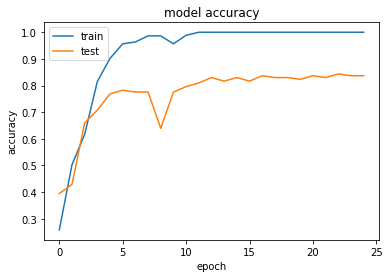

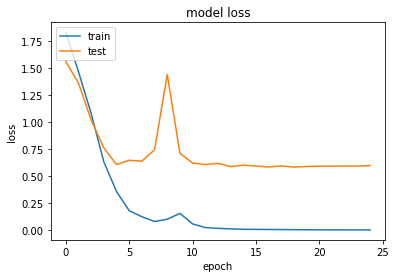

In [89]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [90]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.82      0.82      0.82        28
      GMB_02       0.84      0.84      0.84        32
      GMB_03       0.80      0.91      0.85        22
      GMB_04       0.80      0.78      0.79        36
      GMB_05       0.93      0.86      0.89        29

    accuracy                           0.84       147
   macro avg       0.84      0.84      0.84       147
weighted avg       0.84      0.84      0.84       147



In [91]:
model1.save('nnmodel_dataset')

INFO:tensorflow:Assets written to: nnmodel_dataset/assets


In [92]:
import cv2
import matplotlib.pyplot as plt
image1='leaf-dataset.jpg'

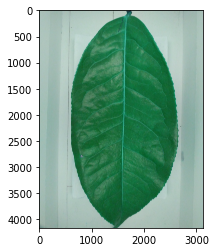

In [93]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [99]:
image_testing = Image.open('leaf-dataset.jpg')
image_testing = np.array(image_testing.resize((256, 256))) / 255.0
image_testing.shape

(256, 256, 3)

In [100]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 256, 256, 3)


In [102]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[4.6716366e-05 9.9995279e-01 3.9648378e-07 8.6156584e-09 7.3820289e-08]]
['GMB_02']
